In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

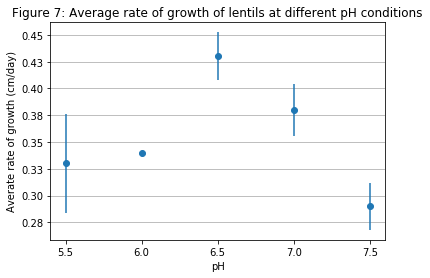

In [2]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

plt.errorbar(
    x=np.arange(5.5, 8.0, 0.5),
    y=[0.33, 0.34, 0.43, 0.38, 0.29],
    yerr=[0.0465, 0.001, 0.0225, 0.024, 0.022],
    fmt='o'
)

ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.xticks(np.arange(5.5, 8.0, 0.5))
plt.grid(axis='y')

plt.title("Figure 7: Average rate of growth of lentils at different pH conditions")
plt.xlabel("pH")
plt.ylabel("Averate rate of growth (cm/day)")

plt.savefig('bo.png', dpi=300)

In [3]:
plt.style.use('bmh')

In [4]:
files = [
    ("fe1", (1, 2, 3)),
    ("fe1half", (0, 1, 2)),
    ("fe2", (0, 1, 2, 3, 4)),
    ("fe2half", (0, 1, 2)),
    ("fe3", (0, 1, 3)),
    ("fe3half", (0, 1, 2)),
    ("fe4", (0, 1, 2, 4))
]
labels = [
    "1.00mL",
    "1.50mL",
    "2.00mL",
    "2.50mL",
    "3.00mL",
    "3.50mL",
    "4.00mL"
]

30.0 103.97578617399999
45.0 107.99133974899999
60.0 111.146166617
0.2963944618999998
30.0 104.20414223899999
45.0 107.59083834299999
60.0 111.83474798299999
0.19720595573333383
30.0 106.32609705899999
45.0 107.935129025
60.0 111.374522682
0.046256741366667124


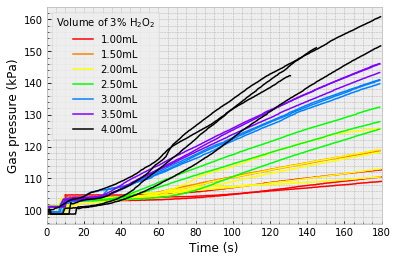

In [5]:
plt.figure()

colours = ["#ff0000", "#ff8000", "#ffff00",
           "#00ff00", "#0080ff", "#7f00ff", 
           "#000000"]

ls = []

for i, (fname, fnums) in enumerate(files):
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")
#         for t in range(1, len(df.time)):
#             rate_at_t = (df.Pressure[t] - df.Pressure[t - 1]) / (df.time[t] - df.time[t - 1])
#             if rate_at_t >= 1.2:
#                 break
#         else:
#             t = 0

        t = 1
        for t2 in range(t, len(df.time)):
            if df.Pressure[t2 - 1] > 110 and df.Pressure[t2] < 110:
                break
        else:
            t2 = len(df.time)

        l, = plt.plot(df.time[t:t2] - df.time[t], 
                      df.Pressure[t:t2], 
                      color=colours[i],
                      linewidth=1.5
                    )
        if i == 4:
            print(df.time[59], df.Pressure[59])
            print(df.time[89], df.Pressure[89])
            print(df.time[119], df.Pressure[119])
            print((-3 * df.Pressure[59] + 4 * df.Pressure[89] - df.Pressure[119]) / 30)
        if fnum == max(fnums):
            ls.append(l)


plt.xlim(0, 180)
plt.xlabel("Time (s)")        
plt.ylabel("Gas pressure (kPa)")

plt.legend(ls, labels, title="Volume of 3% $\mathregular{H_2O_2}$")

plt.minorticks_on()
plt.grid(which='minor')

plt.savefig('raw_data.png', dpi=300)

plt.show()

In [6]:
t_df = pd.Series()
for i, (fname, fnums) in enumerate(files):
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")
        t_df = t_df.append(df.Temperature)

In [7]:
t_df.describe()

count    10007.000000
mean        23.192852
std          0.978834
min         21.565758
25%         22.289592
50%         23.167297
75%         23.803614
max         24.923478
dtype: float64